In [1]:
from model import ParticleClassifier
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix

/Users/shawn/miniconda3/envs/test/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/shawn/miniconda3/envs/test/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/shawn/miniconda3/envs/test/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/shawn/miniconda3/envs/test/lib/python3.6/s

In [2]:
classifier = ParticleClassifier()\
                .load_data('data/toy_data.csv')\
                .train_test_split()\
                .pre_proc_images(train=True, test=True)\
                .one_hot_encode_labels(train=True, test=True)\
                .train_model()\
                .evaluate_model()\

Instructions for updating:
Colocations handled automatically by placer.
Data loaded into self.images, self.labels
Split into self.images_train, self.images_test, self.labels_train, self.labels_test
Train and test labels encoded into self.y_train and self.y_test
Train on 1920 samples, validate on 480 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1920/1920 [==============================] - 7s 3ms/sample - loss: 0.6515 - acc: 0.6839 - val_loss: 0.4018 - val_acc: 0.8375
Epoch 2/10
1920/1920 [==============================] - 5s 3ms/sample - loss: 0.3090 - acc: 0.8786 - val_loss: 0.2653 - val_acc: 0.8875
Epoch 3/10
1920/1920 [==============================] - 5s 3ms/sample - loss: 0.2452 - acc: 0.9047 - val_loss: 0.2586 - val_acc: 0.9062
Epoch 4/10
1920/1920 [==============================] - 5s 3ms/sample - loss: 0.2303 - acc: 0.9141 - val_loss: 0.2134 - val_acc: 0.9021
Epoch 5/10
1920/1920 [==============================] - 5s 3ms/sample - loss: 0.1949 - acc: 0.9318 

In [ ]:
# Hot pixel attack
classifier.hot_pixel_attack()\
          .pre_proc_images(attacked=True)\
          .one_hot_encode_labels(attacked=True)\
          .evaluate_attack()

Train and test labels encoded into self.y_train and self.y_test
Labels: [188 214 198] 
 Original Predictions: [160 227 213] 
 Attacked Predictions: [  0 284 316]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       160
           1       0.77      0.96      0.86       227
           2       0.60      0.89      0.71       213

    accuracy                           0.68       600
   macro avg       0.46      0.62      0.52       600
weighted avg       0.50      0.68      0.58       600



/Users/shawn/miniconda3/envs/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


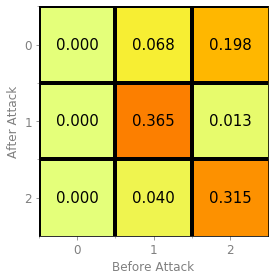

In [3]:
value =  np.mean([classifier.images.max(), classifier.images.mean()])
classifier = classifier.apply_attack(classifier.add_hot_area, size=(2,2), value=value)\
                       .pre_proc_images(attacked=True, filters=False)\
                       .one_hot_encode_labels(attacked=True)\
                       .evaluate_attack()

In [ ]:
pred = classifier.predictions
pred1 = classifier.attacked_predictions
print(pred)
classifier.generate_confusion_matrix(pred, pred1)

In [ ]:
tf.math.confusion_matrix(classifier.predictions, classifier.attacked_predictions)

In [ ]:
cm = confusion_matrix(classifier.predictions, classifier.attacked_predictions)
cm = cm / len(classifier.attacked_predictions)
plt.rcParams.update({'axes.labelsize': 12,
                     'axes.labelcolor': 'gray',
                     'xtick.color': 'gray',
                     'ytick.color': 'gray',
                     'xtick.labelsize': 12,
                     'ytick.labelsize': 12})
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Wistia')
ax.set_xlabel('Before Attack')
ax.set_ylabel('After Attack')
ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))
ax.set_xticklabels(['0', '1', '2'])
ax.set_yticklabels(['0', '1', '2'])
ax.set_xticks(np.arange(3)-0.5, minor=True)
ax.set_yticks(np.arange(3)-0.5, minor=True)

for i in range(len(cm)):
    for j in range(len(cm[0])):
        text = ax.text(j, i, '%.3f'%cm[i, j], ha='center', va='center', color='black', size=15)
ax.grid(which="minor", color="black", linestyle='-', linewidth=4)
fig.tight_layout()

In [ ]:

len(classifier.attacked_predictions)

In [ ]:
classifier.print_image(18, classifier.x_attacked)

In [ ]:
classifier.print_image(18, classifier.x_test)

In [ ]:
classifier.model.predict(np.reshape(classifier.x_attacked[18], (1,50,50,1)))

In [ ]:
n = 1
electrons = classifier.images[classifier.labels == 1]
classifier.print_image(n, electrons, save='img/electron01.png')

In [ ]:
value =  np.mean([classifier.images.max(), classifier.images.mean()])
electron_attacked = electrons[n, :, :, 0].copy()
electron_attacked[11:13, 2:6] = value
electron_attacked[11:13, 9:16] = value
plt.imshow(electron_attacked)
plt.imsave('img/electron01_neutron.png', electron_attacked)

In [ ]:
electron_attacked = np.reshape(electron_attacked, (1, 50, 50, 1))
x = classifier.pre_proc(electron_attacked)
np.argmax(classifier.model.predict(x))

In [ ]:
classifier.print_image(2, classifier.images_attacked)

In [ ]:
classifier.print_image(2, classifier.images_test)